In [1]:
import pytumblr
import json
# import networkx as nx 
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# Authenticate via API Key
client = pytumblr.TumblrRestClient('x2jxd8Iar3OpZAm7Q7FvPHSrPOanJjpmgDLSegiTv4t0TLuyaf')

API Key

OAuth Consumer Key:  x2jxd8Iar3OpZAm7Q7FvPHSrPOanJjpmgDLSegiTv4t0TLuyaf
    
Secret Key:  gEeo7S1FerlYLXHa8No4O9sKrS0lrj3w8I1d6hcLWjX2nWFfjx

Use this page to enter the keys and select Python to see all the sample code in python.
https://api.tumblr.com/console/calls/user/info

You can also gain your own API by register an application using your Tumblr account.
https://www.tumblr.com/oauth/register

In [2]:
#trying to find all the posts contain certain tag which are repostsed from other's blog.
useful_posts = []
last_timestamp = 1676600000 
time_of_run = 0; #indicate how many times you want to run this program, everytime extract 20 posts.
target_tag = 'diet'

while (time_of_run < 2):
    posts = client.tagged(target_tag, before=last_timestamp)
    
    if len(posts) == 0:
        break
        
    for post in posts:    
        user_id = post["blog_name"]
        post_id = post["id"]
        exact_client = client.posts(user_id, id=post_id, reblog_info=True) #set "showing the reblog_info" to be true.
        if "posts" in exact_client: #Check whether this client has ever posted any post.
            exact_post = exact_client["posts"][0] #gain access to the post contains in the list.
            if ('reblogged_from_id' in exact_post):
                print(exact_post)
                useful_posts.extend(exact_post) 
    
    #set the timestamp to the last post in this loop minus one
    last_timestamp = posts[-1]["timestamp"] - 1
    
    time_of_run += 1
    
#check if the program is over.
print("done")

done


In [3]:
useful_posts

[]

In [2]:
#find all the posts of a certain user which are repostsed from other's blog.
#this is used to store the userful posts (useful means this is a re-blog/re-post).
useful_posts = []

In [3]:
user_id = 'wtoreoreo'
exact_client = client.posts(user_id, reblog_info=True)
if ('posts' in exact_client):
    for exact_post in exact_client['posts']:
        if ('reblogged_from_id' in exact_post):
            useful_posts.append(exact_post) 

In [4]:
df = pd.json_normalize(useful_posts) #useful_post is in a list

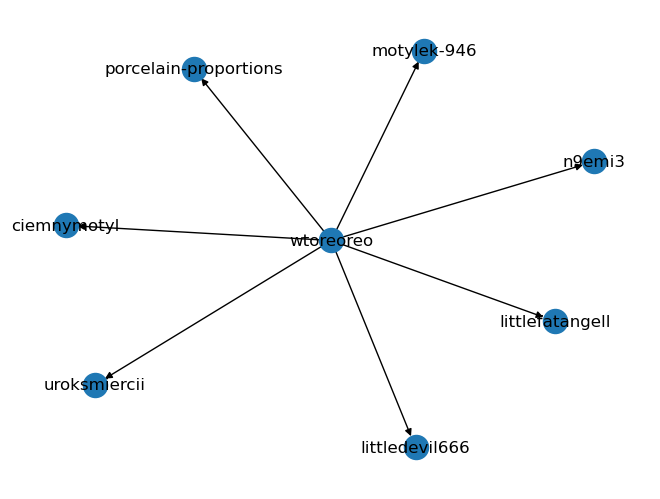

In [5]:
#the middle is the user id of the posts we scrutinized, the others are the user id of the reblogs acctual owner.
G = nx.from_pandas_edgelist(df, source='blog_name', target='reblogged_from_name', create_using=nx.DiGraph)

nx.draw(G, with_labels = True)

In [19]:
# count the time other tags occur in the posts containing target tag (eg. ed but not sheeran).
target_tag = 'ed but not sheeran'
posts = client.tagged(target_tag, before=1676601000)
hashtags = {}
for post in posts:
    for hashtag in post["tags"]:
        if (hashtag not in hashtags):
            hashtags[hashtag] = 1
        else:
            hashtags[hashtag] += 1

pd.Series(hashtags)

ed but not sheeran                                             20
ed ramblings                                                    1
4n4m1a                                                          1
pro for tags                                                    1
pro for only myself                                             1
                                                               ..
4norex1a                                                        2
tw ana thoughts                                                 2
skinnii                                                         2
sewerslide                                                      2
the second one almost made me sick i shouldnt have eaten it     1
Length: 112, dtype: int64

In [12]:
#this is used to store the relation between harmful hashtags and harmless hashtags
hashtags = []

#relatively harmless tag is harmless_tag, harmful_tags means those pro-ed tags. 
harmless_tag = 'diet'
harmful_tags = ['ana', 'ed', 'anorexia']

posts = client.tagged(harmless_tag, before=1676601000)

for post in posts:
    for hashtag in post["tags"]:
        for harmful_tag in harmful_tags:
            if harmful_tag in hashtag.split():
                hashtags.append({
                    "target_tag" : harmless_tag,
                    "tag" : hashtag
                })

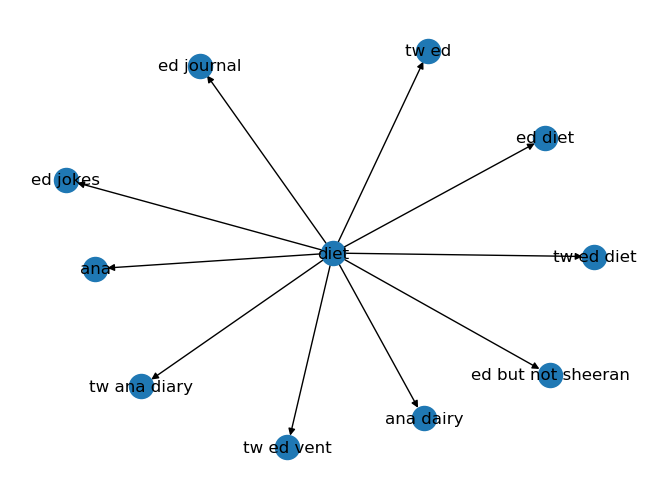

In [11]:
df = pd.json_normalize(hashtags)

G = nx.from_pandas_edgelist(df, source='target_tag', target='tag', create_using=nx.DiGraph)
nx.draw(G, with_labels = True)